# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [3]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

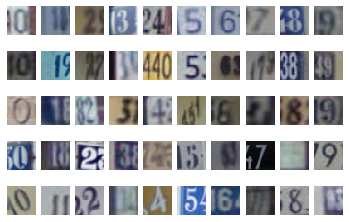

In [4]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [5]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [6]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

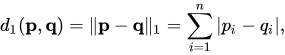

In [7]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [8]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [100]:
num_train = 121
num_test = 16

print(binary_test_X.shape)
print(binary_train_X.shape)

dists = np.zeros((num_test, num_train), np.float32)

i_test = 0

calcc = np.abs(np.repeat(binary_test_X, 121, axis=0) - np.repeat(binary_train_X, 16, axis=0))
print(calcc, calcc.shape)

(16, 3072)
(121, 3072)
[[ 42.  50.  45. ...  93. 133. 136.]
 [ 42.  50.  45. ...  93. 133. 136.]
 [ 42.  50.  45. ...  93. 133. 136.]
 ...
 [ 38.  67.  95. ...  15.  30.  41.]
 [ 38.  67.  95. ...  15.  30.  41.]
 [ 38.  67.  95. ...  15.  30.  41.]] (1936, 3072)


In [165]:
np.sum(np.abs(np.dstack([binary_test_X] * 121) - np.dstack([binary_train_X] * 16).T), axis=1).shape

(16, 3072, 121)

In [9]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [10]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

17.9 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
21.9 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
320 ms ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [176]:
dists.argmin(axis=1)

array([ 74, 119,  93,  69,  74,  14,  73,  12,  29,  95,  22,  12, 105,
        78,  93,   5], dtype=int64)

In [182]:
print(dists.shape)
dists

(16, 121)


array([[179952., 386833., 135249., ..., 333468., 226102., 128616.],
       [162721., 177636., 136718., ..., 153065.,  63917., 196235.],
       [196969., 123306., 217824., ...,  69135., 159849., 292455.],
       ...,
       [139992., 178517., 105113., ..., 134708.,  82620., 192338.],
       [205567., 118504., 219610., ..., 101701., 187631., 292051.],
       [160404., 127059., 155853., ...,  97218.,  74362., 229166.]],
      dtype=float32)

In [181]:
print(binary_train_y.shape)
binary_train_y

(121,)


array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True])

In [11]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [204]:
print(prediction)
print(binary_test_y)

[ True  True False  True  True  True False  True  True False  True  True
  True  True False False]
[ True  True  True False False  True  True  True  True False  True False
  True  True  True  True]


In [12]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.35


In [13]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
KNN with k = 3
Accuracy: 0.50, Precision: 0.70, Recall: 0.58, F1: 0.32


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [23]:
dictt = {idx: {binary_train_y[idx]: binary_train_X[idx]} for idx in range(len(binary_train_y))}
np.random.shuffle(dictt)
dictt

In [284]:
for arr in train_data_fold_X:
    print(arr.shape)

(24, 3072)
(24, 3072)
(24, 3072)
(25, 3072)


In [283]:
train_data_fold_X

[array([[105., 103., 106., ..., 103.,  96.,  93.],
        [ 35.,  37.,  34., ...,  76.,  77.,  71.],
        [142., 113.,  53., ...,  89.,  67.,  17.],
        ...,
        [162., 163., 181., ..., 217., 222., 225.],
        [105., 112., 128., ...,  93.,  89.,  77.],
        [104., 106., 121., ...,  83.,  86.,  95.]], dtype=float32),
 array([[ 67.,  69.,  80., ...,  74.,  68.,  60.],
        [228., 215., 199., ..., 226., 213., 196.],
        [112., 112., 100., ..., 144., 138., 122.],
        ...,
        [131., 136., 139., ...,  79.,  79.,  77.],
        [147., 149., 164., ..., 183., 197., 200.],
        [ 90.,  83.,  90., ...,  76.,  72.,  99.]], dtype=float32),
 array([[ 89.,  97., 133., ..., 122., 130., 150.],
        [ 26.,  27.,  47., ...,  32.,  38.,  50.],
        [197., 202., 203., ..., 217., 222., 223.],
        ...,
        [ 50.,  42.,  64., ...,  25.,  31.,  57.],
        [ 60.,  73.,  98., ...,  90.,  90.,  90.],
        [ 73.,  59.,  58., ...,  98.,  91.,  98.]], dtype=fl

In [322]:
# Find the best k using cross-validation based on F1 score
num_folds = 5

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

train_folds_X = binary_train_X.copy()
train_folds_y = binary_train_y.copy()

step = int(len(train_folds_y) / num_folds)
ostatok = np.round(len(train_folds_y) / num_folds - step, 4)
train_folds_X = [train_folds_X[0+step*i:step+step*i+int(ostatok+ostatok*i)] for i in range(num_folds)]
train_folds_y = [train_folds_y[0+step*i:step+step*i+int(ostatok+ostatok*i)] for i in range(num_folds)]

In [324]:
def all_arrs_to_one(list_arrays):
    one_arr = list_arrays[0]
    for arr in list_arrays[1:]:
        one_arr = np.append(one_arr, arr, axis=0)
    
    return one_arr

In [321]:
train_data_fold_X_aggregated.shape
prediction

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True])

In [335]:
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k_value in k_choices:
    print(k_value)
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    k_all_folds = []
    for i in range(num_folds):
        train_data_fold_X = train_folds_X.copy()
        train_data_fold_X.pop(i)
        train_data_fold_X_aggregated = all_arrs_to_one(train_data_fold_X)
        
        train_data_fold_y = train_folds_y.copy()
        train_data_fold_y.pop(i)
        train_data_fold_y_aggregated = all_arrs_to_one(train_data_fold_y)
        
        validation_data_fold_X = train_folds_X[i]
        validation_data_fold_y = train_folds_y[i]
        
        
        knn_class_fold = KNN(k=k_value)
        knn_class_fold.fit(train_data_fold_X_aggregated, train_data_fold_y_aggregated)
        prediction = knn_class_fold.predict(validation_data_fold_X)
        
        precision, recall, f1, accuracy = binary_classification_metrics(prediction, validation_data_fold_y)
        k_all_folds.append(f1)
        
    # Perform training and produce F1 score metric on the validation dataset
    
    # Average F1 from all the folds and write it into k_to_f1
    print(k_all_folds)
    k_to_f1[k_value] = np.mean(k_all_folds)

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

1
[0.4166666666666667, 0.3225806451612903, 0.24, 0.3333333333333333, 0.3793103448275862]
2
[0.2692307692307692, 0.24000000000000005, 0.25, 0.3, 0.25]
3
[0.375, 0.28125, 0.21428571428571427, 0.3703703703703704, 0.32352941176470584]
5
[0.30000000000000004, 0.28125, 0.2692307692307692, 0.3666666666666667, 0.32352941176470584]
8
[0.19999999999999998, 0.19999999999999998, 0.20833333333333334, 0.25, 0.3]
10
[0.17391304347826086, 0.28571428571428575, 0.19047619047619047, 0.27999999999999997, 0.3225806451612903]
15
[0.23076923076923075, 0.29032258064516125, 0.24, 0.20689655172413793, 0.35294117647058826]
20
[0.19999999999999998, 0.21428571428571427, 0.25925925925925924, 0.22727272727272727, 0.3333333333333333]
25
[0.25, 0.2413793103448276, 0.2222222222222222, 0.1851851851851852, 0.35294117647058826]
50
[0.3103448275862069, 0.15384615384615385, 0.2413793103448276, 0.26666666666666666, 0.3611111111111111]
k = 1, f1 = 0.338378
k = 2, f1 = 0.261846
k = 3, f1 = 0.312887
k = 5, f1 = 0.308135
k = 8, 

### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [349]:
# TODO Set the best k to the best value found by cross-validation
best_k = 3

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 3
Accuracy: 0.50, Precision: 0.70, Recall: 0.58, F1: 0.32


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [350]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [384]:
neighbours = [7, 7, 5, 5, 5, 4]
digit, count = np.unique(neighbours, return_counts=True)
count_sort_ind = np.argsort(-count)
digit[count_sort_ind][0]

5

In [386]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [393]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [399]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = train_X.copy()
train_folds_y = train_y.copy()

step = int(len(train_folds_y) / num_folds)
ostatok = np.round(len(train_folds_y) / num_folds - step, 4)
train_folds_X = [train_folds_X[0+step*i:step+step*i+int(ostatok+ostatok*i)] for i in range(num_folds)]
train_folds_y = [train_folds_y[0+step*i:step+step*i+int(ostatok+ostatok*i)] for i in range(num_folds)]

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k_value in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    
    k_all_folds = []
    for i in range(num_folds):
        train_data_fold_X = train_folds_X.copy()
        train_data_fold_X.pop(i)
        train_data_fold_X_aggregated = all_arrs_to_one(train_data_fold_X)
        
        train_data_fold_y = train_folds_y.copy()
        train_data_fold_y.pop(i)
        train_data_fold_y_aggregated = all_arrs_to_one(train_data_fold_y)
        
        validation_data_fold_X = train_folds_X[i]
        validation_data_fold_y = train_folds_y[i]
        
        knn_class_fold = KNN(k=k_value)
        knn_class_fold.fit(train_data_fold_X_aggregated, train_data_fold_y_aggregated)
        prediction = knn_class_fold.predict(validation_data_fold_X)
        
        accuracy = multiclass_accuracy(prediction, validation_data_fold_y)
        k_all_folds.append(accuracy)
    
    print(k_all_folds)
    k_to_accuracy[k_value] = np.mean(k_all_folds)
    
for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

1
1
1
1
1
[0.275, 0.25, 0.225, 0.23, 0.28]
2
2
2
2
2
[0.265, 0.27, 0.205, 0.22, 0.21]
3
3
3
3
3
[0.24, 0.215, 0.195, 0.235, 0.215]
5
5
5
5
5
[0.22, 0.22, 0.18, 0.21, 0.21]
8
8
8
8
8
[0.21, 0.205, 0.17, 0.24, 0.195]
10
10
10
10
10
[0.22, 0.175, 0.195, 0.22, 0.18]
15
15
15
15
15
[0.18, 0.155, 0.185, 0.25, 0.17]
20
20
20
20
20
[0.14, 0.19, 0.185, 0.245, 0.17]
25
25
25
25
25
[0.175, 0.185, 0.17, 0.27, 0.175]
50
50
50
50
50
[0.18, 0.2, 0.175, 0.285, 0.18]
k = 1, accuracy = 0.252000
k = 2, accuracy = 0.234000
k = 3, accuracy = 0.220000
k = 5, accuracy = 0.208000
k = 8, accuracy = 0.204000
k = 10, accuracy = 0.198000
k = 15, accuracy = 0.188000
k = 20, accuracy = 0.186000
k = 25, accuracy = 0.195000
k = 50, accuracy = 0.204000


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [394]:
# TODO Set the best k as a best from computed
best_k = 1

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


In [400]:
prediction

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 8, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 4, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 3,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 2])

In [408]:
test_y

array([2, 1, 3, 0, 2, 5, 0, 1, 7, 1, 6, 7, 0, 9, 9, 1, 1, 4, 0, 5, 1, 6,
       0, 2, 4, 3, 0, 8, 4, 8, 6, 3, 5, 3, 5, 4, 6, 5, 0, 2, 1, 2, 4, 1,
       7, 5, 9, 7, 6, 4, 4, 8, 1, 3, 4, 0, 7, 2, 5, 6, 8, 1, 2, 3, 3, 9,
       0, 3, 2, 2, 5, 2, 4, 1, 7, 4, 0, 3, 7, 2, 7, 1, 5, 6, 3, 7, 2, 8,
       8, 1, 0, 2, 4, 3, 2, 7, 3, 0, 1, 8], dtype=uint8)

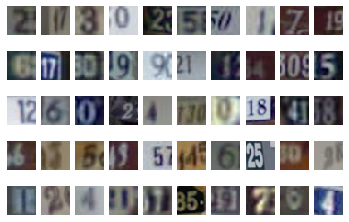

In [407]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for class_index in range(50):
    plt.subplot(5, 10, plot_index)
    image = test_X[class_index]
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plot_index += 1

### Ну такая себе точность вышла :))